In [114]:
#!/usr/bin/python
# -*- coding: utf-8 -*-

import os, sys
import numpy as np
import csv
import pandas as pd
sys.path.append("./pylinguistics/")
import Pylinguistics as pl
import json
import csv
import gc
from pandas import read_csv



fapespall=pd.read_csv('/home/vinicius/Desktop/TCC/fapesp_features.csv')
fapespall.drop('Unnamed: 0', axis=1, inplace=True)




a1=pd.DataFrame(fapespall.loc[7]).T
a2=pd.DataFrame(fapespall.loc[55]).T
a3=pd.DataFrame(fapespall.loc[167]).T
a4=pd.DataFrame(fapespall.loc[201]).T
a5=pd.DataFrame(fapespall.loc[204]).T

a6=pd.DataFrame(fapespall.loc[267]).T
a7=pd.DataFrame(fapespall.loc[475]).T
a8=pd.DataFrame(fapespall.loc[807]).T
a9=pd.DataFrame(fapespall.loc[897]).T
a0=pd.DataFrame(fapespall.loc[1067]).T

aq=pd.DataFrame(fapespall.loc[1152]).T
aw=pd.DataFrame(fapespall.loc[1157]).T
ae=pd.DataFrame(fapespall.loc[1486]).T
ar=pd.DataFrame(fapespall.loc[1568]).T
at=pd.DataFrame(fapespall.loc[1618]).T

ay=pd.DataFrame(fapespall.loc[2185]).T
au=pd.DataFrame(fapespall.loc[2481]).T
ai=pd.DataFrame(fapespall.loc[2537]).T
ao=pd.DataFrame(fapespall.loc[2611]).T
ap=pd.DataFrame(fapespall.loc[2807]).T

fapespResult = pd.concat([a1,a2,a3,a4,a5,a6,a7,a8,a9,a0,aq,aw,ae,ar,at,ay,au,ai,ao,ap])

fapespResult.to_csv('pylinguisticsResults.csv', sep='\t')


In [118]:
pyling=pd.read_csv('pylinguisticsResults.csv', sep='\t')
cohmetrix=pd.read_csv('cohmetrixResults.csv', sep='\t')

def calcMse(a, b):
    r = a - b
    r = r*r
    return r

def calcPmedia(a, b):
    
    return ((100*a) / (float(b)))-100
#'LogicOperatorsIncidence':'logic_operators:logic_operators'    
dic={'adjectiveIncidence':'basic_counts:adjectives','advIncidence':'basic_counts:adverbs','contentIncidence':'basic_counts:content_words','redability':'basic_counts:flesch','functionalIncidence':'basic_counts:function_words','avg_word_per_sentence':'basic_counts:words_per_sentence','nounIncidence':'basic_counts:nouns','sentence_count':'basic_counts:sentences','word_count':'basic_counts:words','pronIncidence':'basic_counts:pronouns','verbIncidence':'basic_counts:verbs','ConnectiveIncidence':'connectives:conn_incidence','LexicalDiversty':'Tokens:ttr', }

result = []
resultp=[]
for index, row in pyling.iterrows():
    mse = {}
    pmedia={}
    for key in dic:
        mse[key] = calcMse(pyling.loc[index][key], cohmetrix.loc[index][dic[key]])
        pmedia[key] = calcPmedia(pyling.loc[index][key], cohmetrix.loc[index][dic[key]])

    result.append(mse)
    resultp.append(pmedia)

    


In [119]:
dfresultp = pd.DataFrame(resultp)
dfresultp.head(20)


,ConnectiveIncidence,LexicalDiversty,adjectiveIncidence,advIncidence,avg_word_per_sentence,contentIncidence,functionalIncidence,nounIncidence,pronIncidence,redability,sentence_count,verbIncidence,word_count
0,-15.789474,0.000000,66.666667,-9.090909,0.000000,-11.229947,12.631579,-18.181818,-15.088757,151.356863,0.000000,-13.793103,0.000000
1,-32.886923,-2.485189,11.440446,-31.712444,0.677201,-8.706476,0.531322,-10.968774,-6.712293,-432.496050,0.000000,-10.410622,0.677201
2,-52.941176,0.000000,54.166667,-11.111111,0.000000,-15.360502,7.608696,-19.730942,-2.501840,-34.699760,0.000000,-26.984127,0.000000
3,-47.708886,-0.110840,25.651908,-13.979986,17.969374,-9.413587,6.819667,-13.086046,-4.990621,-19.138471,-14.893617,-24.112669,0.399467
4,-48.000000,-1.117318,23.076923,66.666667,0.000000,-4.191617,-3.225806,-10.091743,-10.000000,47.256932,0.000000,-13.793103,0.000000
5,-8.919753,4.579946,3157.870370,5.092593,90.308370,-15.826312,189.004630,-24.896609,-15.456238,-241.162230,-50.000000,12.098765,-4.845815
6,-41.145997,-2.038565,32.082833,-11.292517,0.204499,-8.064719,1.875000,-11.782614,-11.891892,30.710776,0.000000,-16.347539,0.204499
7,-28.972713,-1.284985,4.173355,-27.078652,0.564972,-9.514433,-1.917773,-3.735357,-10.152284,23.684187,0.000000,-22.278187,0.564972
8,-34.848623,-0.842783,17.227390,-16.963932,6.630370,-7.865479,-0.061916,-14.313269,-6.077210,-26.892792,-5.882353,1.471599,0.357995
9,-15.848261,-1.019282,30.530822,-20.438356,8.930211,-5.732649,0.936414,-7.222580,-15.972222,-8.188167,-7.692308,-11.598174,0.550964


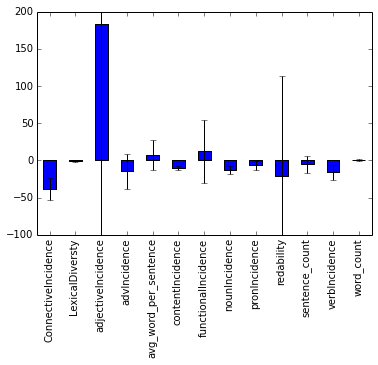

In [121]:
#saida = dfresultp[dfresultp.adjectiveIncidence < 200 ]
saida = dfresultp
#print saida
#print saida.columns[[8]]
#saida.drop('u'redability'',  inplace=True)
#saida.drop(saida.columns[[8]], inplace=True)
#saida.drop('adjectiveIncidence',  inplace=True)

import matplotlib.pyplot as plt


yerrs =saida.std()

saida.mean().plot(kind='bar' ,yerr=yerrs, ylim=(-100,200))

In [93]:
%matplotlib inline
import matplotlib.pyplot as plt

dfresult = pd.DataFrame(result)
dfresult.head(20)

,ConnectiveIncidence,LexicalDiversty,LogicOperatorsIncidence,adjectiveIncidence,advIncidence,avg_word_per_sentence,contentIncidence,functionalIncidence,nounIncidence,pronIncidence,redability,sentence_count,verbIncidence,word_count
0,109.264408,0.000000e+00,303.512244,1214.048975,12.140490,0.000000,5353.955979,1748.230524,6992.922095,70.759234,272.222405,0,194.247836,0
1,754.470865,2.362721e-04,619.583550,112.110474,131.187344,0.090000,2857.690272,3.916304,1648.907960,19.307690,1668.209563,0,143.643582,9
2,1153.435386,0.000000e+00,430.758277,601.637593,3.559986,0.000000,8547.525810,697.757209,6892.132431,0.721958,126.909790,0,1028.835885,0
3,2582.846822,2.622850e-07,1598.282504,492.931054,16.771771,8.244229,3382.722691,628.151844,2993.617669,3.219265,23.312611,49,409.158702,9
4,1632.486481,4.534685e-05,725.549547,408.121620,45.346847,0.000000,555.498872,181.387387,1371.742112,45.346847,58.335572,0,181.387387,0
5,8.685133,4.276778e-04,121.290924,4838.122842,0.113242,2626.562500,21640.766928,17747.334521,48840.350957,1.043130,10753.725404,16,15.979122,484
6,1076.878417,1.285788e-04,821.103153,497.605923,4.319652,0.003086,2319.137340,54.198502,1902.053387,36.962744,30.485585,0,516.779018,1
7,525.155427,4.428659e-05,1027.675990,2.724082,58.512351,0.020408,3105.257289,63.132186,174.900471,28.658573,20.077994,0,1332.321829,9
8,467.616584,1.700244e-05,629.267588,109.923691,23.604102,2.670581,2123.856987,0.062366,2749.580153,28.026330,63.719281,4,3.663902,9
9,128.853641,3.510268e-05,373.028138,181.093852,31.701417,6.217990,1110.356494,11.949011,878.909137,55.951957,4.098527,1,132.303385,4


In [94]:
cohmetrix[dic['redability']].head(20)


0     10.900836
1     -9.443721
2     32.465425
3     25.228313
4     16.162227
5    -43.000171
6     17.978625
7     18.919153
8     29.682436
9     24.724482
10    29.993934
11    30.246734
12     6.928000
13    36.655250
14    32.591965
15    23.725006
16    15.490058
17    26.447105
18    40.255350
19    21.474345
Name: basic_counts:flesch, dtype: float64

In [95]:
pyling.head(20)

,Unnamed: 0,ConnectiveAdditiveIncidence,ConnectiveCasualIncidence,ConnectiveIncidence,ConnectiveLogicIncidence,ConnectiveTemporalIncidence,ContentDiversty,LexicalDiversty,LogicAndIncidence,LogicIfIncidence,...,percentile_75_word_length,percentile_90_sentence_length,percentile_90_word_length,pronIncidence,redability,sentence_count,sentence_sized_30,syllable_count,verbIncidence,word_count
0,7,0.000000,0.000000,55.749129,0.000000,0.000000,0.819277,0.641115,0.000000,0.000000,...,3,72.0,5,47.337278,27.4,7,57,656,87.108014,287
1,55,0.000000,13.452915,56.053812,0.000000,13.452915,0.824000,0.603139,0.000000,0.000000,...,3,79.2,5,61.068702,31.4,10,70,1117,103.139013,446
2,167,0.000000,1.886792,30.188679,0.000000,1.886792,0.588889,0.441509,0.000000,0.000000,...,3,40.5,4,33.112583,21.2,20,50,1187,86.792453,530
3,201,0.000000,2.652520,55.702918,0.000000,2.652520,0.639810,0.461538,0.000000,0.000000,...,4,43.1,5,34.157833,20.4,40,25,1829,63.660477,754
4,204,0.000000,6.734007,43.771044,0.000000,6.734007,0.818750,0.595960,0.000000,0.000000,...,3,46.6,4,60.606061,23.8,10,40,701,84.175084,297
5,267,0.000000,2.314815,30.092593,0.000000,2.314815,0.541420,0.472222,0.000000,0.000000,...,4,321.7,5,5.586592,60.7,4,50,1250,37.037037,432
6,475,0.000000,8.163265,46.938776,0.000000,8.163265,0.769517,0.544898,0.000000,0.000000,...,3,44.3,5,45.045045,23.5,18,55,1181,116.326531,490
7,807,0.000000,7.490637,56.179775,0.000000,7.490637,0.706714,0.511236,0.000000,0.000000,...,3,38.0,5,47.377327,23.4,21,42,1315,127.340824,534
8,897,0.000000,4.756243,40.428062,0.000000,4.756243,0.711454,0.485137,0.000000,0.000000,...,3,44.6,4,81.818182,21.7,32,40,1924,131.985731,841
9,1067,0.000000,10.958904,60.273973,2.739726,10.958904,0.755000,0.575342,0.000000,2.739726,...,3,60.6,4,39.351852,22.7,12,50,819,87.671233,365


In [96]:
dfresult.head(20)

,ConnectiveIncidence,LexicalDiversty,LogicOperatorsIncidence,adjectiveIncidence,advIncidence,avg_word_per_sentence,contentIncidence,functionalIncidence,nounIncidence,pronIncidence,redability,sentence_count,verbIncidence,word_count
0,109.264408,0.000000e+00,303.512244,1214.048975,12.140490,0.000000,5353.955979,1748.230524,6992.922095,70.759234,272.222405,0,194.247836,0
1,754.470865,2.362721e-04,619.583550,112.110474,131.187344,0.090000,2857.690272,3.916304,1648.907960,19.307690,1668.209563,0,143.643582,9
2,1153.435386,0.000000e+00,430.758277,601.637593,3.559986,0.000000,8547.525810,697.757209,6892.132431,0.721958,126.909790,0,1028.835885,0
3,2582.846822,2.622850e-07,1598.282504,492.931054,16.771771,8.244229,3382.722691,628.151844,2993.617669,3.219265,23.312611,49,409.158702,9
4,1632.486481,4.534685e-05,725.549547,408.121620,45.346847,0.000000,555.498872,181.387387,1371.742112,45.346847,58.335572,0,181.387387,0
5,8.685133,4.276778e-04,121.290924,4838.122842,0.113242,2626.562500,21640.766928,17747.334521,48840.350957,1.043130,10753.725404,16,15.979122,484
6,1076.878417,1.285788e-04,821.103153,497.605923,4.319652,0.003086,2319.137340,54.198502,1902.053387,36.962744,30.485585,0,516.779018,1
7,525.155427,4.428659e-05,1027.675990,2.724082,58.512351,0.020408,3105.257289,63.132186,174.900471,28.658573,20.077994,0,1332.321829,9
8,467.616584,1.700244e-05,629.267588,109.923691,23.604102,2.670581,2123.856987,0.062366,2749.580153,28.026330,63.719281,4,3.663902,9
9,128.853641,3.510268e-05,373.028138,181.093852,31.701417,6.217990,1110.356494,11.949011,878.909137,55.951957,4.098527,1,132.303385,4


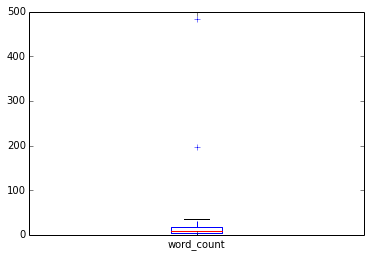

In [97]:
dfresult.word_count.plot(kind='box')

In [122]:
def levenshtein(source, target):
    if len(source) < len(target):
        return levenshtein(target, source)

    # So now we have len(source) >= len(target).
    if len(target) == 0:
        return len(source)

    # We call tuple() to force strings to be used as sequences
    # ('c', 'a', 't', 's') - numpy uses them as values by default.
    source = np.array(tuple(source))
    target = np.array(tuple(target))

    # We use a dynamic programming algorithm, but with the
    # added optimization that we only need the last two rows
    # of the matrix.
    previous_row = np.arange(target.size + 1)
    for s in source:
        # Insertion (target grows longer than source):
        current_row = previous_row + 1

        # Substitution or matching:
        # Target and source items are aligned, and either
        # are different (cost of 1), or are the same (cost of 0).
        current_row[1:] = np.minimum(
                current_row[1:],
                np.add(previous_row[:-1], target != s))

        # Deletion (target grows shorter than source):
        current_row[1:] = np.minimum(
                current_row[1:],
                current_row[0:-1] + 1)

        previous_row = current_row

    return previous_row[-1]

In [127]:
levenshtein("pedrão","pedrao")

2